# welcome to tensorflow

## Deep learning, and really tensorflow for that matter, are tools that you use to solve some black box relationship between inputs and outputs.

For example, imagine you have some box that asks you to tell it a number, and for every input it performs some internal operation and then produces an output.  

Assuming that the system is not producing random results - that there is **some logic**, _any logic_ to the way our black box produces output, we can use a deep learning system to decipher that logic.

So - if the black box is adding '1' to the input, then we can use tensorflow to figure that out. If the black box is keeping track of the numbers that were input, and returning the number that followed the last time someone entered your number - *we can use tensorflow to figure it out!!!*

This black box analogy can be extended to anything you can feed into a computer. If your input is a waveform, and the output is a phase shifted version of the waveform - guess what? yup. tensorflow can figure that out. If the input is the waveform and the output is the decimal number of the dominant frequency? Yes, this is decipherable information.

Before I lose my audience, here's one more task: how about feeding the black box a picture, and the system tells you the hand drawn number from the picture, oh yeah - tensorflow is a master black-box deciphering machine.

So what's the catch? Well - there's actually a pretty big catch.

In order for tensorflow to figure out the relationship between the input and the output you - the human - have to define the model. And, the model has to be more or less a good description of the system. If you make a bad model, tensorflow is going to solve for the relationship based upon the wrong model. 

The consequence of having tensorflow solve a system with an incorrectly defined model is that the output does not predictably match the response of the black box. It's not that tensorflow couldn't solve the problem - it's that either the number of inputs and ouputs was not sufficient, or that you specified the wrong type of operation for tensorflow to solve.

So the trick is to get the right amount of information that you can feed into your system for training, and that your model acccurately represents the balck box. This is a non-trivial task, because in many, many, many - if not most of the problems that wind up in front of the deep learning scientist - neccessarily have nonlinearities and ambiguities, and the computational operation isn't as simple, predictable and linear as 'add one to the input.' Furthermore, the model that the deep learning scientist creates of the black box is a guess. It starts out as a guess, it's success is measured by it's statistically significant ability to produce outputs that mirror what the black box produces, and in the end we say "yeah, p=.05, we figured it out!"

So, in order to decipher the black box, we need to know how to use this tensorflow tool.

Let's start to figure out how to wield tensorflow with a simple sequence of examples. Assume that we have a black box that we fed in the number `1`, and it spit out the number `2`. 

* `source` is a known value that we put in to our black box system (`1`)
* `label`  is a measured value that was spit out of our black box system (`2`)
* `b` is some a variable that tensorflow is going to modify as it attempts to solve our system model
* `logits` is "our guess" of what the black box is doing (adding some offset `b` to the input)
* `loss` is the a entity that tensorflow will aim to reduce - it is the quantification of the difference between "our guess" and the actual iteration of the black box 
* `train_op` is tensorflow's optimization operation. In each iteration of this, any variable we have will be adjusted as it attempts to reach its goal (in this case minimizing `loss`)
* `init_op` initializes our variables - tensorflow cannot operate on uninitalized variables
* `sess` is the tensorflow session. Once the session is activated:
    * `sess.run` performs actual tensorflow operations:
    * `sess.run(init_op)` runs the initialization operation we defined before
    * `sess.run(train_op)` performs a single iteration of the training algorithm which will update `b`
    * `b_eval = sess.run(b)` returns the trained value by evaluating the 'Variable' tensor `b`

In [20]:
# FRONT MATTER - IMPORT LIBRARIES
# so we can use tensorflow
import tensorflow as tf

# so we can plot training data
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = [4.8, 3.6]

In [9]:
source = tf.constant(1.0, dtype=tf.float32)
labels = tf.constant(2.0, dtype=tf.float32)

b      = tf.Variable(0.0, dtype=tf.float32)

logits = source + b
loss   = tf.reduce_sum(tf.square(logits-labels))

train_op = tf.train.AdamOptimizer(learning_rate=0.05).minimize(loss)

init_op  = tf.global_variables_initializer()

with tf.Session() as sess:

    # initialize global variables
    sess.run(init_op)

    # run the training operation 
    for indx in range(500):
        sess.run(train_op)

    # display the result
    b_eval = sess.run(b)
    print("after training 500 times, b = {}".format(b_eval))


after training 500 times, b = 1.0000001192092896


This should make sense; intuitively, we knew that the black box was adding 1 to the input. That's why we defined the model the way we did - because our assumption was that the black box was adding some offset to the input.

Suppose, however, we approach the black box again and input the number '2', at which point it spits out the number '4'. Let's assume that our model of the black box is still valid, and train on this new data point.

As we perform this new operation, we'll make a couple changes:
* `source` and `labels` are now placeholders at model design time. This will allow us to replace them with arbitrary values at train time
* `train_op` is going to be run with a `feed_dict` parameter, with keys and values for our placeholders
* `b_eval` is an array that is going hold the output of `b` after each iteration of training. (to help visualize what is happening during training)

after training 300 times, b = 1.5011570453643799


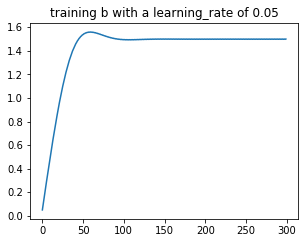

In [21]:
source = tf.placeholder(dtype=tf.float32)
labels = tf.placeholder(dtype=tf.float32)

b      = tf.Variable(0.0, dtype=tf.float32)

logits = source + b
loss   = tf.reduce_sum(tf.square(logits-labels))

train_op = tf.train.AdamOptimizer(learning_rate=0.05).minimize(loss)

init_op  = tf.global_variables_initializer()

with tf.Session() as sess:

    # initialize global variables
    sess.run(init_op)

    # an array that will hold a snapshot of our variable at each step of training
    b_eval = []
    
    # run the training operation 
    for indx in range(150):
        sess.run(train_op, feed_dict={source:1, labels:2})
        b_eval.append( sess.run(b) )

        sess.run(train_op, feed_dict={source:2, labels:4})
        b_eval.append( sess.run(b) )
        
    # display the final trained value 
    print("after training 300 iterations, b = {}".format(b_eval[-1]))

    plt.plot(b_eval)
    plt.title("training b with a learning_rate of 0.05")
    plt.show()


So - clearly tensorflow believes it has found the solution to the black box, as the value of `b` has converged on 1.5. This all well and good - but emperically we can tell that this is not in fact the solution to the black box, since `1 + 1.5` is not `2` _and_ `2 + 1.5` is not `4`. 

What _has_ happened is that we have told tensorflow to minimize `loss`; i.e. find the value of `b` that keeps `loss` to a minimum. By virtue of our model comprising of **solely** an addition operation, finding a value that minimizes `loss` effectively means finding the average difference between inputs and outputs. 

This is a simple example of the programmer's model not matching the actual black box - and is homomorphic to the design problems that you will encounter at every level of deep learning; if you are trying to do image recognition with an `y = mx + b` style model, it's not going to work, no matter how many fully connected layers you strap on to the end. The model of the system you design in tensorflow can and should be general and account for nonlinearities, but still must basically match the underlying behavior of the black box.

Becoming a deep learning scientist means knowing how to use your tools. In the same sense that knowing only how to use a screwdriver will get you only so far in automobile repair, knowing how to use only a convnet will limit your potential in deep learning. While there are many excellent example models to be found on the internet, there is simply no 'one size fits all' deep learning system that will solve your problem. Example models should be regarded as solutions to specific problems and demonstrations of appropriateness of algorithms to classes of problems, but to treat them differently is the functional equivalent of approaching a phillips head screw with a flathead screwdriver, or a hammer. 

With this cautionary advice in mind, take a step forward and welcome to the world of deep learning and tensorflow. You will find that it is among the most fascinating and intellectually stimulating endeavors you can undertake. Your curiousity will be rewarded handsomely as you imagine the possiblities that lie in linking any algorithm you can imagine.